# Configuration

In [2]:
import os
import pandas             as pd
import numpy              as np
import seaborn            as sns
import spotipy
import spotipy.oauth2     as oauth2
import spotipy.util       as util


from pprint import pprint
import csv
import os


from matplotlib           import pyplot as plt 
from IPython.core.display import display, HTML

In [3]:
# -------------------------------------------
# Jupyter notebook Settings
# -------------------------------------------
display( HTML( '<style>.container { width:95% !important; }</style>' ) )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

# -------------------------------------------
# Plotting Settings
# -------------------------------------------
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style("whitegrid")
sns.despine(right = True)
pd.options.display.float_format = '{:.2f}'.format

<Figure size 720x720 with 0 Axes>

# Utils

In [4]:
def export_id_column_from_df(df, file_name):
    df = df['id']
    df.to_csv("../csv/{}".format(file_name))

# Getting Dataframe

In [5]:
df_raw = pd.read_csv('../csv/saved_tracks.csv')
df_raw.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1VtaojCYMam56z117O2wo9,https://open.spotify.com/track/1VtaojCYMam56z1...,Loving Her,Katie Pruitt,Loving Her,False,44,304013,10,1,4,0.46,0.41,0.03,0.68,0.00,0.09,0.25,80.39
1,57YK2tEwFHYMAAqjb6tdop,https://open.spotify.com/track/57YK2tEwFHYMAAq...,O Que Eu Bebi,Clarice Falcão,Monomania,False,42,131657,0,1,4,0.83,0.07,0.07,0.88,0.00,0.09,0.69,89.97
2,5pHzIjrVsV1GG3E1G0fsWU,https://open.spotify.com/track/5pHzIjrVsV1GG3E...,Gone Too Long,Cat Dealers,Gone Too Long,False,65,191086,10,0,4,0.63,0.80,0.12,0.01,0.00,0.40,0.43,124.00
3,0r71bOApGbwrGrl2Tn0AWw,https://open.spotify.com/track/0r71bOApGbwrGrl...,Ants,Tank and The Bangas,Green Balloon,True,40,305493,5,0,4,0.45,0.61,0.20,0.53,0.00,0.14,0.43,170.91
4,1XEvp87jyYo3ynqHSMmEbc,https://open.spotify.com/track/1XEvp87jyYo3ynq...,Quick,Tank and The Bangas,Quick,False,39,266649,1,0,4,0.62,0.69,0.31,0.05,0.00,0.47,0.55,135.01


## Quick explanation:

* **Instrumentalness**: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* **Acousticness**: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
* **Liveness**: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
* **Speechiness**: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* **Energy**: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
* **Danceability**: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
* **Valence**: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

## Histograms

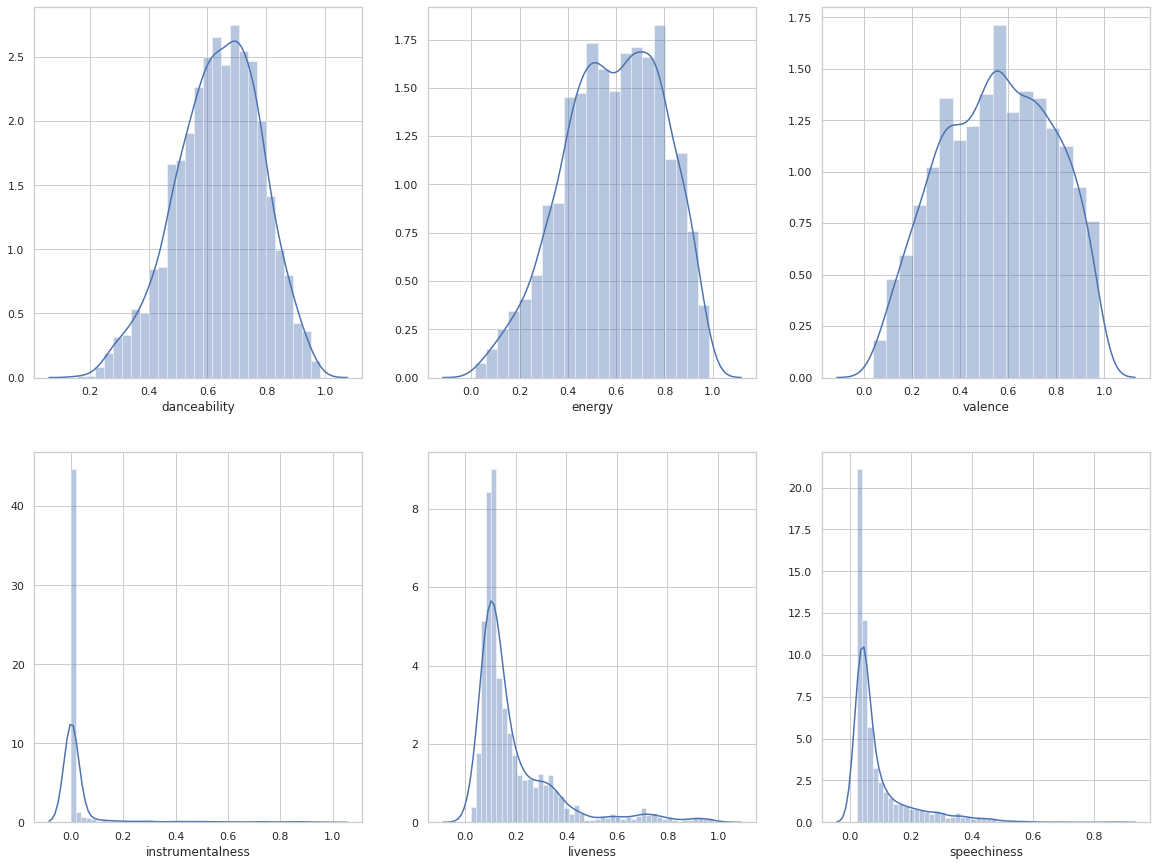

In [6]:
# Setting subplots
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting
sns.distplot(df_raw['danceability'], ax=axs[0,0])
sns.distplot(df_raw['energy'], ax=axs[0,1])
sns.distplot(df_raw['valence'], ax=axs[0,2])
sns.distplot(df_raw['instrumentalness'], ax=axs[1,0])
sns.distplot(df_raw['liveness'], ax=axs[1,1])
sns.distplot(df_raw['speechiness'], ax=axs[1,2])
plt.show()

## Boxplots

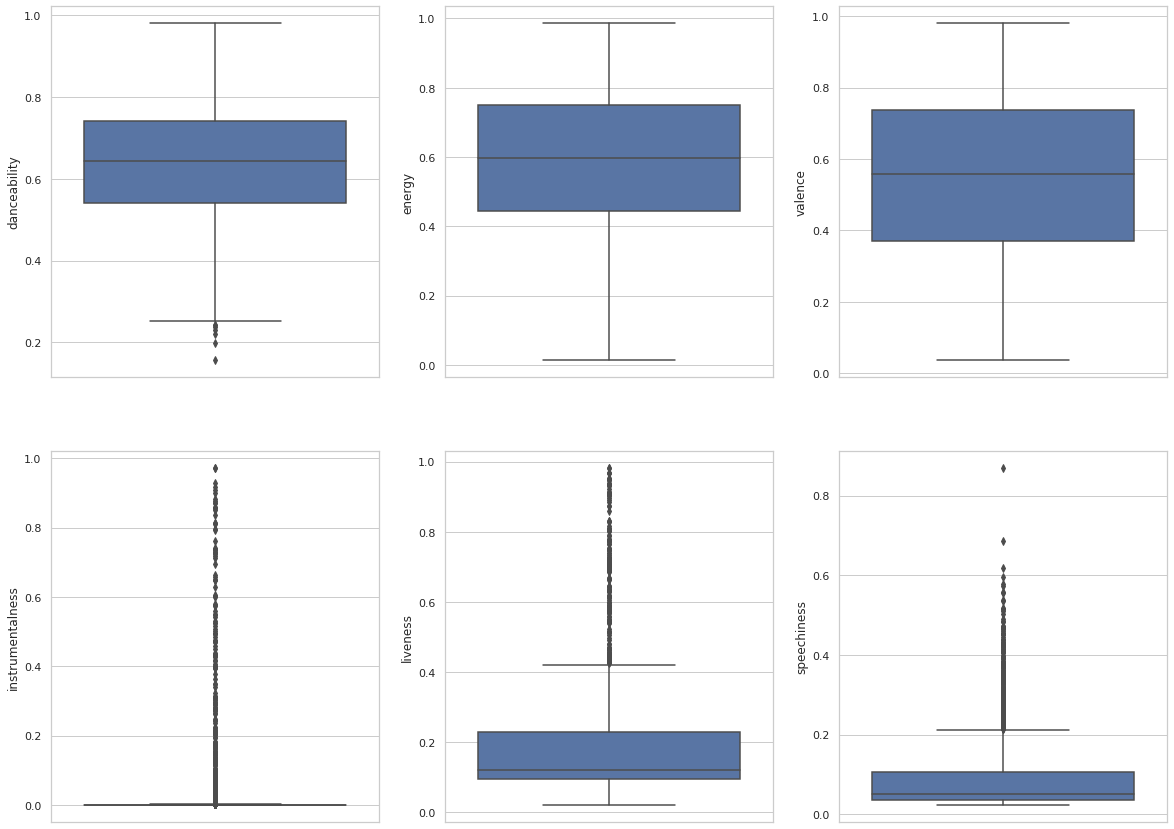

In [7]:
# Setting subplots
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting
sns.boxplot(df_raw['danceability'], orient="v", ax=axs[0,0])
sns.boxplot(df_raw['energy'], orient="v", ax=axs[0,1])
sns.boxplot(df_raw['valence'], orient="v", ax=axs[0,2])
sns.boxplot(df_raw['instrumentalness'], orient="v", ax=axs[1,0])
sns.boxplot(df_raw['liveness'], orient="v", ax=axs[1,1])
sns.boxplot(df_raw['speechiness'], orient="v", ax=axs[1,2])
plt.show()

In [8]:
df_raw.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00,2080.00
mean,42.30,224321.67,5.36,0.55,3.94,0.64,0.59,0.10,0.34,0.03,0.19,0.55,117.33
std,23.55,54985.05,3.59,0.50,0.32,0.14,0.20,0.10,0.30,0.13,0.17,0.23,27.94
min,0.00,53454.00,0.00,0.00,1.00,0.16,0.01,0.02,0.00,0.00,0.02,0.04,54.75
25%,27.00,189462.75,2.00,0.00,4.00,0.54,0.44,0.04,0.07,0.00,0.10,0.37,95.01
50%,48.00,217385.50,5.00,1.00,4.00,0.64,0.60,0.05,0.26,0.00,0.12,0.56,115.99
75%,60.00,252570.00,9.00,1.00,4.00,0.74,0.75,0.11,0.58,0.00,0.23,0.74,133.27
max,97.00,614615.00,11.00,1.00,5.00,0.98,0.99,0.87,0.99,0.97,0.98,0.98,212.14


## Possibly offset music

In [47]:
df = df_raw.loc[(df_raw['energy'] > 0.57) & (df_raw['danceability'] > 0.70) & (df_raw['valence'] > 0.61)]
df

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
12,2A1xJI2naUT75RwcWXSuWG,https://open.spotify.com/track/2A1xJI2naUT75Rw...,Bonita Applebum - Sir Piers and Si Ashton's Cu...,A Tribe Called Quest,The Essential New School Vs. Old School,False,38,414560,11,0,4,0.88,0.81,0.12,0.00,0.66,0.09,0.86,122.01
13,3G0yz3DZn3lfraledmBCT0,https://open.spotify.com/track/3G0yz3DZn3lfral...,P.I.M.P.,50 Cent,Get Rich Or Die Tryin',True,73,249480,10,0,4,0.71,0.77,0.35,0.05,0.00,0.04,0.85,84.72
15,7iL6o9tox1zgHpKUfh9vuC,https://open.spotify.com/track/7iL6o9tox1zgHpK...,In Da Club,50 Cent,Get Rich Or Die Tryin',True,76,193466,6,0,4,0.90,0.71,0.37,0.26,0.00,0.07,0.78,90.05
20,749mPYdePHdjsfucRBz1Ow,https://open.spotify.com/track/749mPYdePHdjsfu...,If You Wouldn't Mind,2nd Exit,2nd Exit,False,49,238499,5,0,4,0.77,0.59,0.30,0.66,0.01,0.10,0.83,179.99
37,276zciJ7Fg7Jk6Ta6QuLkp,https://open.spotify.com/track/276zciJ7Fg7Jk6T...,Come Down,Anderson .Paak,Malibu,True,65,169726,8,1,4,0.84,0.90,0.10,0.27,0.02,0.30,0.93,98.40
44,1ITsmuChPVC05ogvorAyVu,https://open.spotify.com/track/1ITsmuChPVC05og...,Boys,Lizzo,Cuz I Love You (Deluxe),False,68,172630,6,0,4,0.89,0.59,0.12,0.00,0.00,0.05,0.75,120.03
47,6EMWT7sZBvG0oxdh9KXbb4,https://open.spotify.com/track/6EMWT7sZBvG0oxd...,Juice,Lizzo,Cuz I Love You (Deluxe),True,55,195144,7,1,4,0.77,0.89,0.10,0.01,0.00,0.40,0.84,119.93
49,61hCh0pmmBPFxhigW0BhKn,https://open.spotify.com/track/61hCh0pmmBPFxhi...,A Vida É uma Dança,Ó Do Forró,O Som Que Balança o Coração,False,24,242373,2,1,4,0.78,0.94,0.04,0.25,0.00,0.15,0.69,91.00
65,7FIWs0pqAYbP91WWM0vlTQ,https://open.spotify.com/track/7FIWs0pqAYbP91W...,Godzilla (feat. Juice WRLD),Eminem,Music To Be Murdered By,True,94,210800,10,0,4,0.81,0.74,0.34,0.14,0.00,0.29,0.83,166.00
73,2FT8msBBwok2NvwneARlib,https://open.spotify.com/track/2FT8msBBwok2Nvw...,Eu Só Quero Um Xodó,Bicho de Pé,A Vida Vai,False,35,213173,9,1,4,0.71,0.61,0.03,0.16,0.00,0.15,0.61,98.01


# Clustering

## K-Means

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
df_raw = pd.read_csv('../csv/saved_tracks.csv')
df_raw.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1VtaojCYMam56z117O2wo9,https://open.spotify.com/track/1VtaojCYMam56z1...,Loving Her,Katie Pruitt,Loving Her,False,44,304013,10,1,4,0.46,0.41,0.03,0.68,0.00,0.09,0.25,80.39
1,57YK2tEwFHYMAAqjb6tdop,https://open.spotify.com/track/57YK2tEwFHYMAAq...,O Que Eu Bebi,Clarice Falcão,Monomania,False,42,131657,0,1,4,0.83,0.07,0.07,0.88,0.00,0.09,0.69,89.97
2,5pHzIjrVsV1GG3E1G0fsWU,https://open.spotify.com/track/5pHzIjrVsV1GG3E...,Gone Too Long,Cat Dealers,Gone Too Long,False,65,191086,10,0,4,0.63,0.80,0.12,0.01,0.00,0.40,0.43,124.00
3,0r71bOApGbwrGrl2Tn0AWw,https://open.spotify.com/track/0r71bOApGbwrGrl...,Ants,Tank and The Bangas,Green Balloon,True,40,305493,5,0,4,0.45,0.61,0.20,0.53,0.00,0.14,0.43,170.91
4,1XEvp87jyYo3ynqHSMmEbc,https://open.spotify.com/track/1XEvp87jyYo3ynq...,Quick,Tank and The Bangas,Quick,False,39,266649,1,0,4,0.62,0.69,0.31,0.05,0.00,0.47,0.55,135.01


In [58]:
cluster_features = [
#        "explicit",
#        "popularity",
#        "duration_ms",
#        "key",
#        "mode",
#        "time_signature",
       "danceability",
       "energy",
       "speechiness",
       "acousticness",
       "instrumentalness",
       "liveness",
       "valence",
#        "tempo",
]
df_cluster = df_raw[cluster_features]
array_cluster = np.array(df_cluster)
array_cluster_normalized = StandardScaler().fit_transform(array_cluster)

In [59]:
# Others Kmeans methods:
# cluster_centers_ => returns the center of the clusters
# labels_ => The same as fit_predict()
k = 2
kmeans = KMeans(n_clusters=k, random_state=0).fit(array_cluster_normalized)
cluster_column = kmeans.predict(array_cluster_normalized)
df_results = df_raw.copy()
df_results['cluster_index'] = cluster_column
df_results.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_index
0,1VtaojCYMam56z117O2wo9,https://open.spotify.com/track/1VtaojCYMam56z1...,Loving Her,Katie Pruitt,Loving Her,False,44,304013,10,1,4,0.46,0.41,0.03,0.68,0.00,0.09,0.25,80.39,0
1,57YK2tEwFHYMAAqjb6tdop,https://open.spotify.com/track/57YK2tEwFHYMAAq...,O Que Eu Bebi,Clarice Falcão,Monomania,False,42,131657,0,1,4,0.83,0.07,0.07,0.88,0.00,0.09,0.69,89.97,0
2,5pHzIjrVsV1GG3E1G0fsWU,https://open.spotify.com/track/5pHzIjrVsV1GG3E...,Gone Too Long,Cat Dealers,Gone Too Long,False,65,191086,10,0,4,0.63,0.80,0.12,0.01,0.00,0.40,0.43,124.00,1
3,0r71bOApGbwrGrl2Tn0AWw,https://open.spotify.com/track/0r71bOApGbwrGrl...,Ants,Tank and The Bangas,Green Balloon,True,40,305493,5,0,4,0.45,0.61,0.20,0.53,0.00,0.14,0.43,170.91,0
4,1XEvp87jyYo3ynqHSMmEbc,https://open.spotify.com/track/1XEvp87jyYo3ynq...,Quick,Tank and The Bangas,Quick,False,39,266649,1,0,4,0.62,0.69,0.31,0.05,0.00,0.47,0.55,135.01,1


In [60]:
df_cluster_one = df_results.loc[df_results['cluster_index'] == 1]
df_cluster_zero = df_results.loc[df_results['cluster_index'] == 0]
df_cluster_zero.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_index
count,718.00,718.00,718.00,718.00,718.00,718.00,718.00,718.00,718.00,718.00,718.00,718.00,718.00,718.00
mean,41.30,223010.82,5.24,0.62,3.87,0.57,0.40,0.07,0.62,0.05,0.17,0.39,114.55,0.00
std,23.07,57972.14,3.54,0.49,0.46,0.14,0.15,0.09,0.26,0.16,0.15,0.19,29.31,0.00
min,0.00,53454.00,0.00,0.00,1.00,0.16,0.01,0.02,0.00,0.00,0.05,0.04,54.75,0.00
25%,23.00,184937.25,2.00,0.00,4.00,0.48,0.30,0.03,0.45,0.00,0.10,0.25,90.01,0.00
50%,46.00,218066.50,5.00,1.00,4.00,0.57,0.41,0.04,0.67,0.00,0.11,0.37,112.89,0.00
75%,59.00,257095.00,8.00,1.00,4.00,0.67,0.49,0.07,0.83,0.00,0.17,0.52,132.88,0.00
max,97.00,478173.00,11.00,1.00,5.00,0.96,0.88,0.57,0.99,0.97,0.98,0.94,205.71,0.00


In [61]:
export_id_column_from_df(df_cluster_one, 'cluster_zero_tracks.csv')

### Validation

In [62]:
results = {}
tristeza_success = 0
dizem_success = 1

# Dizem que o amor atrai
df_dizem_raw = pd.read_csv('../csv/dizem_que_o_amor_atrai.csv')
df_dizem = df_dizem_raw[cluster_features]
array_dizem_normalized = StandardScaler().fit_transform(np.array(df_dizem))
cluster_column = kmeans.predict(array_dizem_normalized)
df_dizem_results = df_dizem_raw.copy()
df_dizem_results['cluster'] = cluster_column
success_num = df_dizem_results['cluster'].loc[df_dizem_results['cluster'] == dizem_success].count()
fail_num = df_dizem_results['cluster'].loc[df_dizem_results['cluster'] == tristeza_success].count()
results['dizem que o amor atrai'] = success_num/(success_num + fail_num)

# A tristeza é senhora
df_tristeza_raw = pd.read_csv('../csv/a_tristeza_é_senhora.csv')
df_tristeza = df_tristeza_raw[cluster_features]
array_tristeza_normalized = StandardScaler().fit_transform(np.array(df_tristeza))
cluster_column = kmeans.predict(array_tristeza_normalized)
df_tristeza_results = df_tristeza_raw.copy()
df_tristeza_results['cluster'] = cluster_column
success_num = df_tristeza_results['cluster'].loc[df_tristeza_results['cluster'] == tristeza_success].count()
fail_num = df_tristeza_results['cluster'].loc[df_tristeza_results['cluster'] == dizem_success].count()
results['a tristeza é senhora'] = success_num/(success_num + fail_num)

results

{'dizem que o amor atrai': 0.6818851251840943,
 'a tristeza é senhora': 0.40467625899280574}

# Cluster visualization

## PCA

In [52]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA()
data_pca = pca.fit_transform(df_results[cluster_features])
df_pca = pd.DataFrame(data = data_pca)
df_pca.columns = ['PC{}'.format(i+1) for i, column in enumerate(df_pca.columns)]
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.48,0.19,-0.02,-0.12,-0.05,-0.02,-0.04
1,0.63,-0.36,-0.20,0.21,-0.03,-0.08,-0.04
2,-0.35,0.22,0.19,0.07,-0.02,0.08,-0.00
3,0.20,0.09,0.05,-0.18,-0.07,0.04,0.12
4,-0.30,0.10,0.22,0.17,-0.05,0.06,0.20


In [64]:
pca.explained_variance_ratio_

array([0.4529334 , 0.20173449, 0.12080399, 0.06949765, 0.0654752 ,
       0.05347245, 0.03608282])

In [65]:
pca.components_ 

array([[-0.09391605, -0.48573088, -0.01502383,  0.81099873,  0.02032226,
        -0.04579861, -0.30788005],
       [-0.30020027, -0.04585221, -0.05594775, -0.39338672,  0.04605171,
        -0.01283265, -0.86464367],
       [-0.29692741,  0.3041161 , -0.02110795,  0.1926888 , -0.03204562,
         0.88348496, -0.01415634],
       [ 0.5730197 , -0.60186973,  0.10217855, -0.28522063, -0.03238333,
         0.4623946 , -0.05246475],
       [ 0.14672823,  0.08294973, -0.12910339,  0.03751431,  0.97537525,
         0.04466779, -0.01276986],
       [ 0.59094918,  0.52435419,  0.40399836,  0.24749041, -0.09282961,
        -0.0356046 , -0.376139  ],
       [-0.33733071, -0.159378  ,  0.89770584, -0.0799333 ,  0.18819254,
        -0.01097612,  0.11403787]])

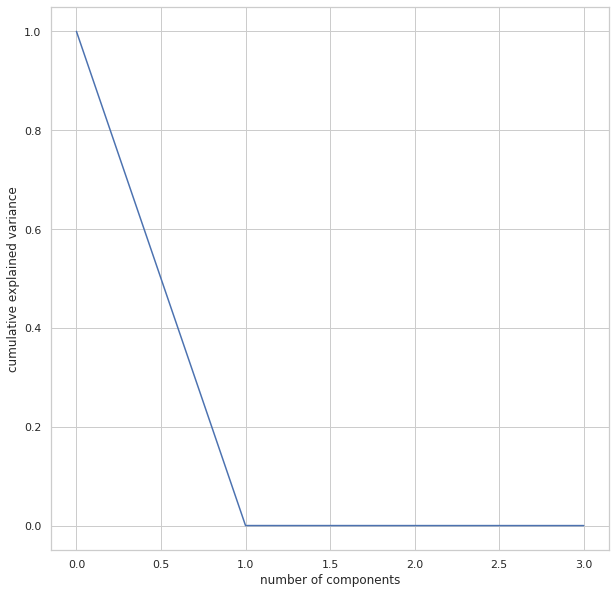

In [56]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

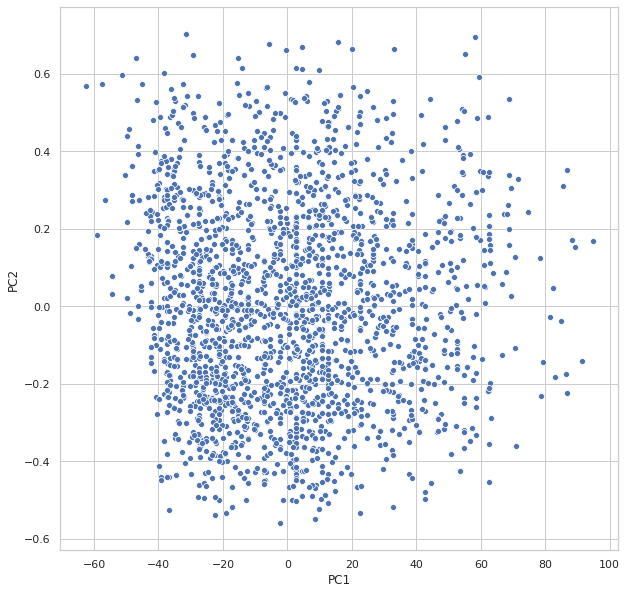

In [57]:
sns.scatterplot(x='PC1', y='PC2', data=df_pca)

# Prepping Dataset for Logistic Regression

In [6]:
df_t = pd.read_csv('../csv/a_tristeza_é_senhora.csv')
df_d = pd.read_csv('../csv/dizem_que_o_amor_atrai.csv')
df_t['label'] = 0
df_d['label'] = 1
df = pd.concat([df_t,df_d], ignore_index=True)
df.to_csv("../csv/my_music_dataset.csv")